In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

In [2]:
ds = xr.open_dataset('gridfile_test.nc')
ds2 = xr.open_dataset('erai_regrid_5x5.nc')

In [3]:
obs = xr.open_dataset('../GPS-RO__CP_LR_5x5_2007-2018.nc')

In [4]:
ds2.time

<xarray.DataArray 'time' (time: 370)>
array(['1979-02-14T21:00:00.000000000', '1979-03-16T09:00:00.000000000',
       '1979-04-15T21:00:00.000000000', ..., '2019-06-15T21:00:00.000000000',
       '2019-07-16T09:00:00.000000000', '2019-08-16T09:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1979-02-14T21:00:00 ... 2019-08-16T09:00:00
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

In [5]:
ds_slice = ds.sel(lat=slice(-20,20))
obs_slice = obs.sel(lat = slice(-20,20))
ds2_slice = ds2.sel(lat=slice(-20,20), time=slice('2007-01-01', '2018-12-31'))

In [6]:
obs_mon = obs_slice.resample(time='M').mean()

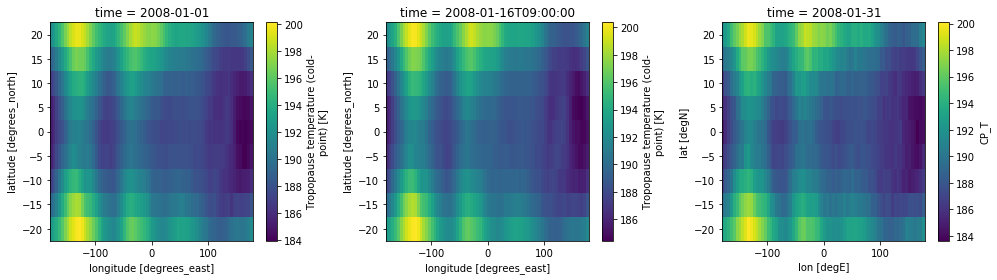

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

ds_slice.ctpt[12,:,:].plot(ax=ax1)
ds2_slice.ctpt[12,:,:].plot(ax=ax2)
obs_mon.CP_T[12,:,:].plot(ax=ax3)

plt.tight_layout()

In [8]:
diff1 = ds_slice.ctpt[12,:,:] - ds2_slice.ctpt[12,:,:]

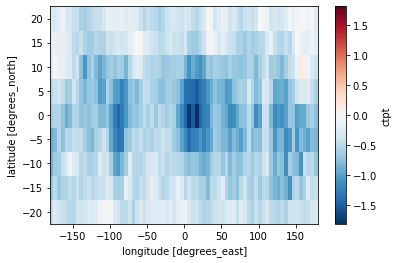

In [11]:
diff1.plot()

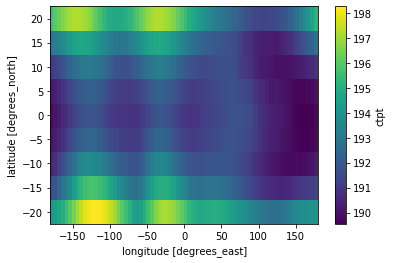

In [12]:
ds_slice.ctpt[:,:,:].mean(axis=0).plot()

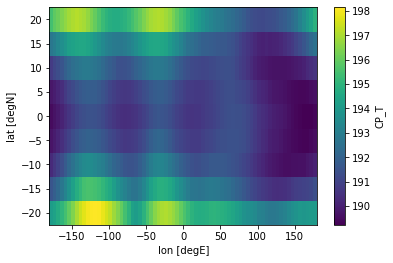

In [13]:
obs_mon.CP_T[:,:,:].mean(axis=0).plot()

In [14]:
d = ds_slice.ctpt[:,:,:].mean(axis=0)-obs_mon.CP_T[:,:,:].mean(axis=0)
d2 = ds2_slice.ctpt[:,:,:].mean(axis=0)-obs_mon.CP_T[:,:,:].mean(axis=0)
gps_mean_cpt = obs_mon.CP_T[:,:,:].mean(axis=0)

Text(0.5, 1.0, 'ERA-I - GNSS-RO \ncold point temperature 2007-2018')

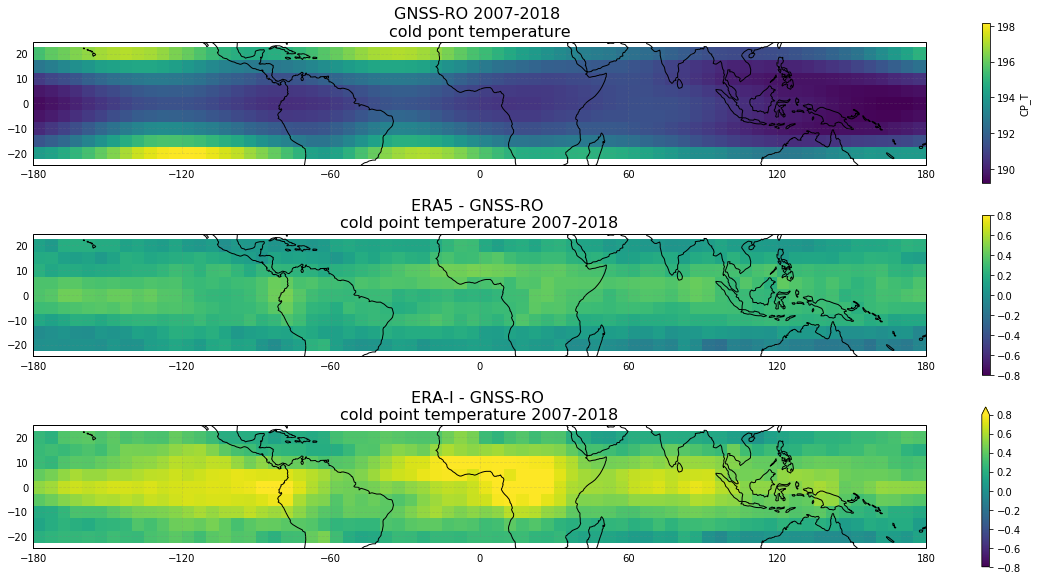

In [15]:


proj = ccrs.PlateCarree(central_longitude = 0)
xticks = [-180,-120, -60, 0, 60, 120, 180]
yticks = [-20, -10, 0, 10, 20]
t_lev = np.linspace(-0.8,0.8,9)
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 10),subplot_kw={'projection':proj})

#ax1
#ax1 = plt.axes(projection=proj)
gps_mean_cpt.plot(ax=ax1)
ax1.coastlines()
gl = ax1.gridlines(xlocs=xticks, ylocs=yticks, draw_labels=True, alpha=0.2, color='gray', linestyle='--')
gl.xlabels_top=False
gl.ylabels_right=False
ax1.set_title('GNSS-RO 2007-2018 \ncold pont temperature', fontsize = 16)


#ax2
#t = plt.figure(figsize=(20,4))
#ax2 = plt.axes(projection=proj)
d.plot(ax=ax2, cbar_kwargs={"ticks": t_lev}, vmin=-0.8, vmax=0.8)
ax2.coastlines()
gl = ax2.gridlines(xlocs=xticks, ylocs=yticks, draw_labels= True, alpha = 0.2, color = 'gray', linestyle = '--')
gl.xlabels_top = False
gl.ylabels_right = False
ax2.set_title('ERA5 - GNSS-RO \ncold point temperature 2007-2018', fontsize=16)
 

# ax3
#t = plt.figure(figsize=(20, 4))
#ax3 = plt.axes(projection=proj)
d2.plot(ax=ax3, cbar_kwargs={"ticks": t_lev}, vmin=-0.8, vmax=0.8)
ax3.coastlines()
gl = ax3.gridlines(xlocs=xticks, ylocs=yticks, draw_labels= True, alpha = 0.2, color = 'gray', linestyle = '--')
gl.xlabels_top = False
gl.ylabels_right = False
ax3.set_title('ERA-I - GNSS-RO \ncold point temperature 2007-2018', fontsize=16)


#ttt.savefig('figs/cpt_latlon_annualmean1.pdf')
#f.savefig('figs/cpt_latlon_annualmean.pdf')

In [16]:
d_lrt = ds_slice.tpt[:,:,:].mean(axis=0)-obs_mon.LR_T[:,:,:].mean(axis=0)
d2_lrt = ds2_slice.tpt[:,:,:].mean(axis=0)-obs_mon.LR_T[:,:,:].mean(axis=0)
obs_mean_lrt = obs_mon.LR_T[:,:,:].mean(axis=0)

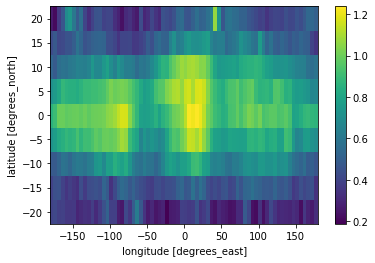

In [17]:
d2_lrt.plot()

Text(0.5, 1.0, 'ERA-I - GNSS-RO \nlapse rate temperature 2007-2018')

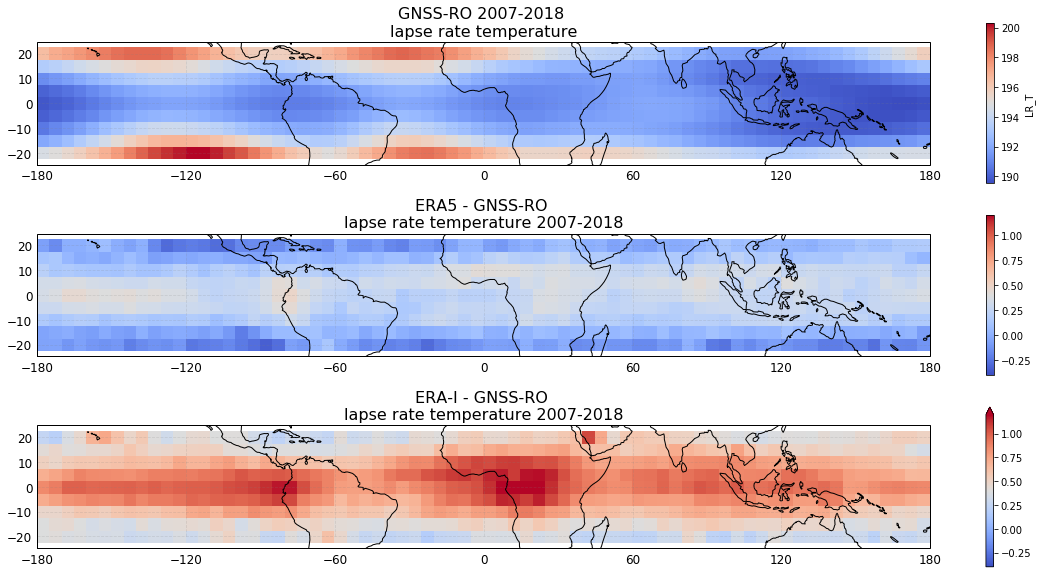

In [35]:

proj = ccrs.PlateCarree(central_longitude = 0)
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 10), subplot_kw={'projection':proj})
xticks = [-180,-120, -60, 0, 60, 120, 180]
yticks = [-20, -10, 0, 10, 20]
cm = 'coolwarm'
#t_lev = np.linspace(-0.8,0.8,9)

#ax1
#ax1 = plt.axes(projection=proj)
obs_mean_lrt.plot(ax=ax1, cmap=cm)
ax1.coastlines()
gl = ax1.gridlines(xlocs=xticks, ylocs=yticks, draw_labels=True, alpha = 0.2, color = 'gray', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size':12}
gl.ylabel_style = {'size':12}
ax1.set_title('GNSS-RO 2007-2018 \nlapse rate temperature', fontsize=16)

#ax2
#plt.figure(figsize=(20,4))
#ax2 = plt.axes(projection=proj)
d_lrt.plot(ax=ax2, vmin=-0.4, vmax=1.2, cmap=cm)
ax2.coastlines()
gl  = ax2.gridlines(xlocs=xticks, ylocs=yticks, draw_labels= True, alpha = 0.2, color = 'gray', linestyle = '--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
ax2.set_title('ERA5 - GNSS-RO \nlapse rate temperature 2007-2018', fontsize=16)
 

# ax2
#plt.figure(figsize=(20, 4))
#ax3 = plt.axes(projection=proj)
d2_lrt.plot(ax=ax3,vmin=-0.4, vmax=1.2, cmap=cm)
ax3.coastlines()
gl = ax3.gridlines(xlocs=xticks, ylocs=yticks, draw_labels= True, alpha = 0.2, color = 'gray', linestyle = '--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
ax3.set_title('ERA-I - GNSS-RO \nlapse rate temperature 2007-2018', fontsize=16)


#f.savefig('figs/lrt_latlon_annualmean.pdf')

In [19]:
## Seasonalized plots

In [9]:
season1 = ds_slice.tpt.groupby('time.season').mean(dim='time')
season2 = ds2_slice.tpt.groupby('time.season').mean(dim='time')
season_obs = obs_slice.LR_T.groupby('time.season').mean(dim='time')

In [10]:
S_cpt_obs = obs_slice.CP_T.groupby('time.season').mean(dim='time')
S_cpt_era5 = ds_slice.ctpt.groupby('time.season').mean(dim='time')
S_cpt_erai = ds2_slice.ctpt.groupby('time.season').mean(dim='time')

In [11]:
DJF_obs = season_obs[0,:,:]
DJF_era5_obs = season1[0,:,:]- season_obs[0,:,:]
DJF_erai = season2[0,:,:] - season_obs[0,:,:]

In [12]:
DJF_cpt_obs = S_cpt_obs[0,:,:]
DJF_cpt_era5 = S_cpt_era5[0,:,:] - DJF_cpt_obs
DJF_cpt_erai = S_cpt_erai[0,:,:] - DJF_cpt_obs

In [13]:
import plot_func as pf

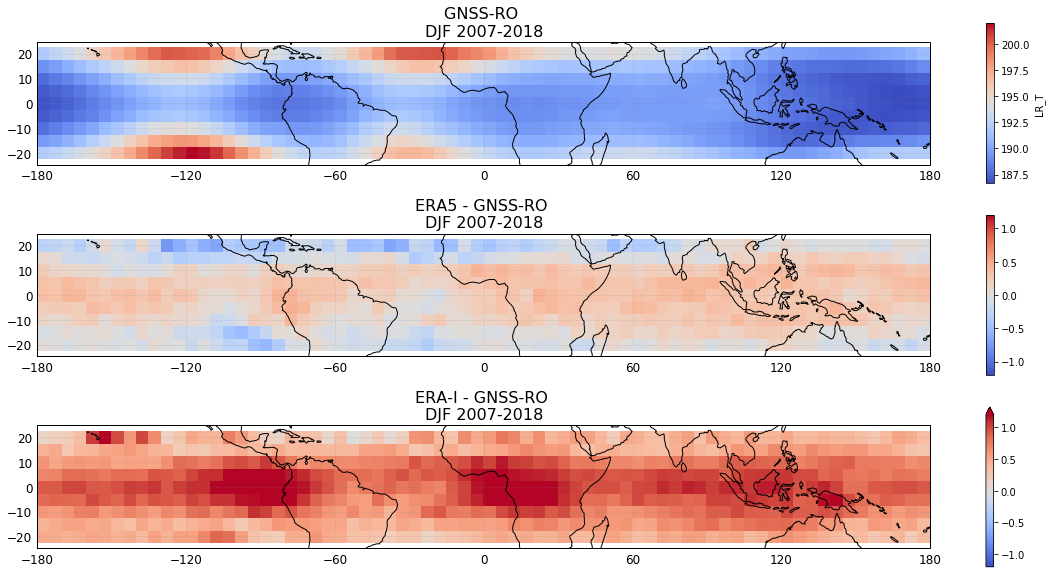

In [14]:
ff = pf.three_plot(DJF_obs, DJF_era5_obs, DJF_erai, 'GNSS-RO \nDJF 2007-2018', 
                   'ERA5 - GNSS-RO \nDJF 2007-2018', 'ERA-I - GNSS-RO \nDJF 2007-2018', vmin= -1.2, vmax=1.2)
#ff.savefig('figs/lrt_djf_latlon.pdf')

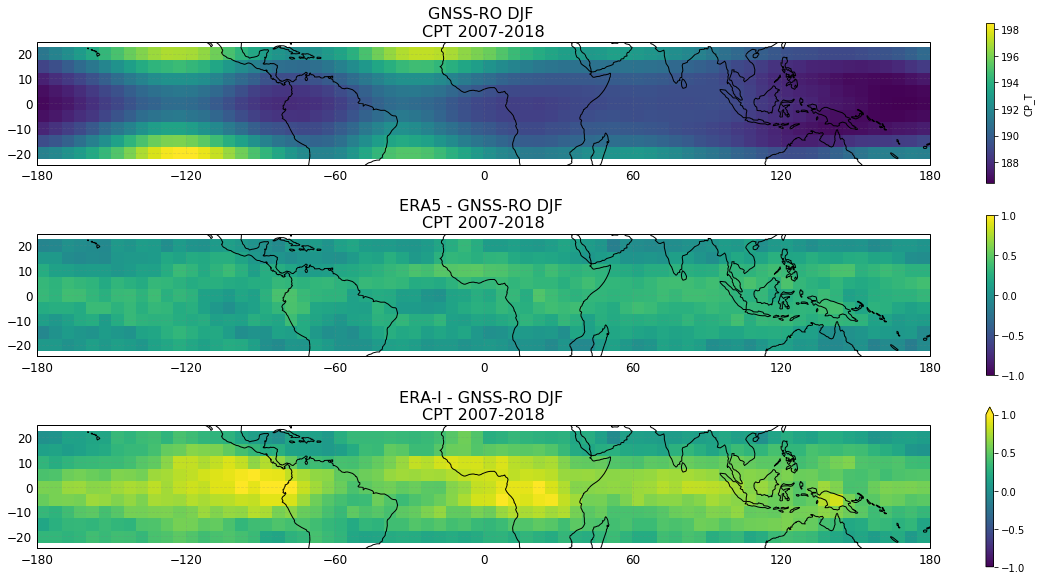

In [27]:
cpt_f = pf.three_plot(DJF_cpt_obs, DJF_cpt_era5, DJF_cpt_erai, 'GNSS-RO DJF \nCPT 2007-2018', 
                     'ERA5 - GNSS-RO DJF \nCPT 2007-2018', 'ERA-I - GNSS-RO DJF \nCPT 2007-2018',
                     vmin=-1.0, vmax=1.0)
#cpt_f.savefig('cpt_djf_latlon.pdf')

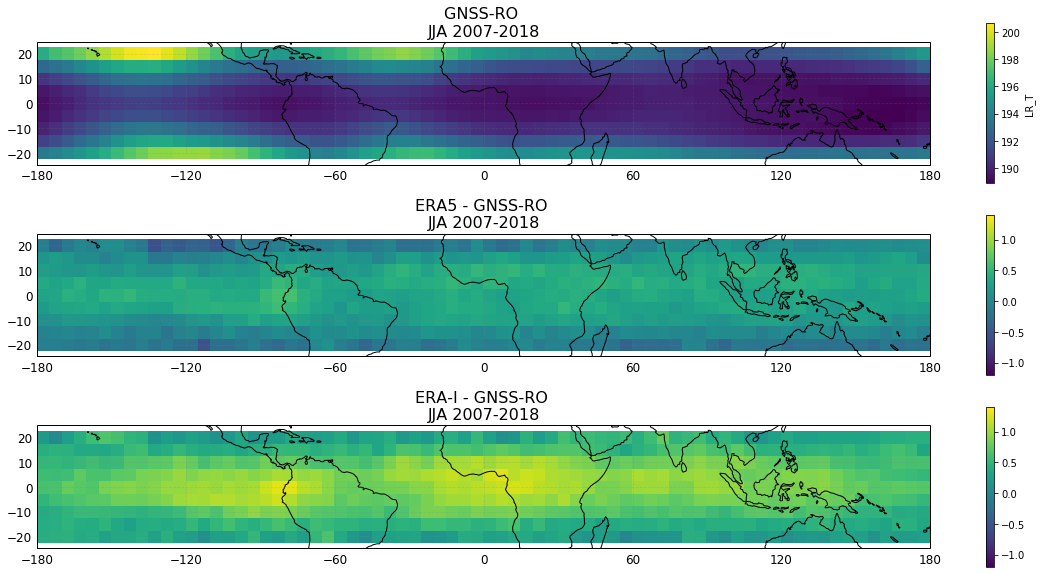

In [27]:
JJA_obs = season_obs[2,:,:]
JJA_era5_obs = season1[2,:,:]- season_obs[2,:,:]
JJA_erai = season2[2,:,:] - season_obs[2,:,:]

ff2 = pf.three_plot(JJA_obs, JJA_era5_obs, JJA_erai, 'GNSS-RO \nJJA 2007-2018', 'ERA5 - GNSS-RO \nJJA 2007-2018',
                   'ERA-I - GNSS-RO \nJJA 2007-2018', vmin= -1.2, vmax = 1.4)
#ff2.savefig('lrt_jja_latlon.pdf')

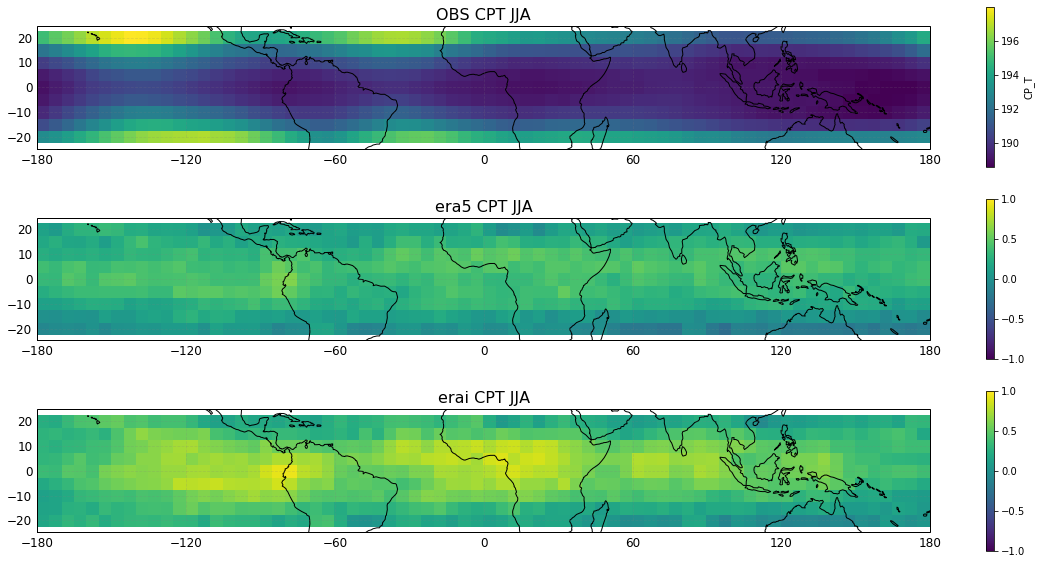

In [28]:
JJA_cpt_obs = S_cpt_obs[2, :, :]
JJA_cpt_era5 = S_cpt_era5[2,:,:] - JJA_cpt_obs
JJA_cpt_erai = S_cpt_erai[2,:,:] - JJA_cpt_obs

jja_cpt = pf.three_plot(JJA_cpt_obs, JJA_cpt_era5, JJA_cpt_erai, 'OBS CPT JJA', 'era5 CPT JJA', 'erai CPT JJA', 
                      vmin=-1.0, vmax = 1.0)
#jja_cpt.savefig('cpt_jja_latlon.pdf')

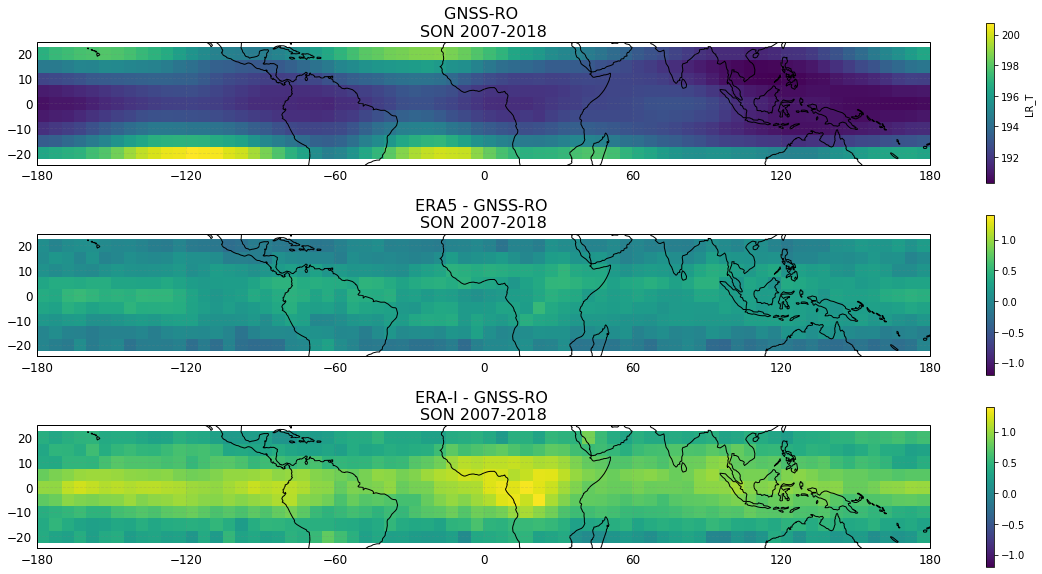

In [29]:
SON_obs = season_obs[3,:,:]
SON_era5_obs = season1[3,:,:]- season_obs[3,:,:]
SON_erai = season2[3,:,:] - season_obs[3,:,:]

ff2 = pf.three_plot(SON_obs, SON_era5_obs, SON_erai, 'GNSS-RO \nSON 2007-2018', 'ERA5 - GNSS-RO \nSON 2007-2018',
                   'ERA-I - GNSS-RO \nSON 2007-2018', vmin= -1.2, vmax = 1.4)
#ff2.savefig('lrt_son_latlon.pdf')

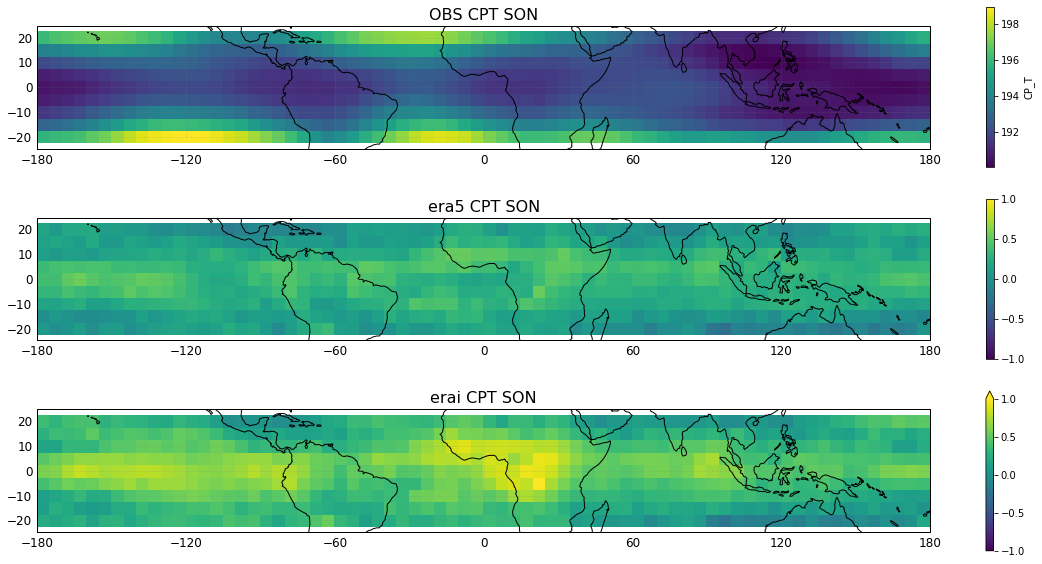

In [30]:
SON_cpt_obs = S_cpt_obs[3, :, :]
SON_cpt_era5 = S_cpt_era5[3,:,:] - SON_cpt_obs
SON_cpt_erai = S_cpt_erai[3,:,:] - SON_cpt_obs

son_cpt = pf.three_plot(SON_cpt_obs, SON_cpt_era5, SON_cpt_erai, 'OBS CPT SON', 'era5 CPT SON', 'erai CPT SON', 
                      vmin=-1.0, vmax = 1.0)
#son_cpt.savefig('cpt_son_latlon.pdf')

## Gjøre høyden også, blir mange plot